In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

events_data = pd.read_csv(r'C:\Users\nadys\Desktop\Projects\data\ML_tastks\event_data_train.csv')

In [2]:
events_data['date'] = pd.to_datetime(events_data['timestamp'], unit='s')
events_data['day'] = events_data['date'].dt.date

<Axes: xlabel='day'>

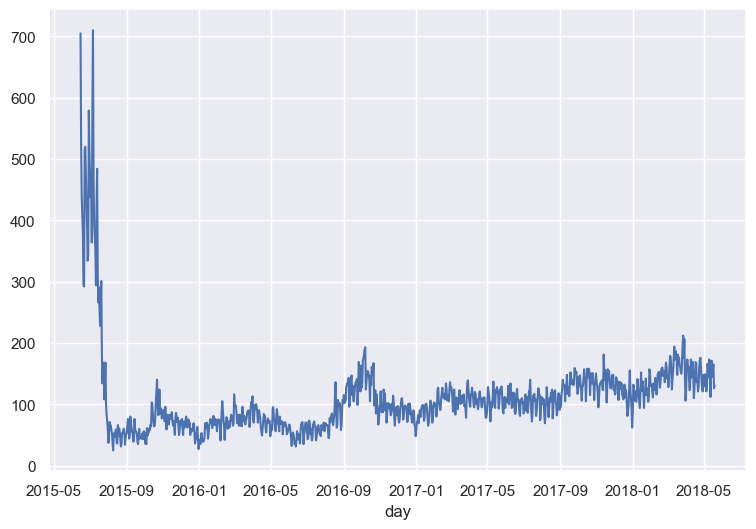

In [6]:
sns.set_theme(rc={'figure.figsize': (9, 6)})
events_data.groupby('day').user_id.nunique().plot()

In [49]:
for_plot = events_data.pivot_table(index='user_id',
                 columns='action',
                 values='step_id',
                 aggfunc='count',
                 fill_value=0).reset_index()

In [60]:
value_to_find = for_plot.passed.max()
result = for_plot.query('passed == @value_to_find')['user_id'].values[0]
result

np.int64(22)

In [14]:
events_data.head(4)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15


In [71]:
submissions_data = pd.read_csv(r'C:\Users\nadys\Desktop\Projects\data\ML_tastks\submissions_data_train.csv')

In [74]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
95,33734,1435733587,correct,15853
96,33874,1435743086,correct,15853
97,33890,1435743679,correct,15853
98,33983,1435653127,wrong,15853


In [9]:
submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit='s')
submissions_data['day'] = submissions_data['date'].dt.date

In [63]:
users_scores = submissions_data.pivot_table(index='user_id',
                 columns='submission_status',
                 values='step_id',
                 aggfunc='count',
                 fill_value=0).reset_index()

In [67]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [70]:
value_to_find = users_scores.correct.max()
result = users_scores.query('correct == @value_to_find')['user_id'].values[0]
result

np.int64(3)

In [27]:
import numpy as np

gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

gap_data = pd.Series(np.concatenate(gap_data, axis=0))
gap_data = gap_data / (24*60*60)

<Axes: >

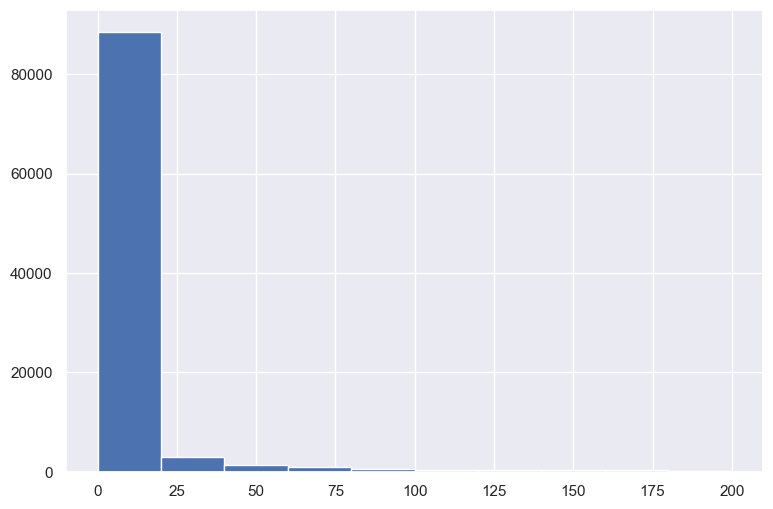

In [29]:
gap_data[gap_data < 200].hist()

In [31]:
gap_data.quantile(0.90)

np.float64(18.325995370370403)

In [38]:
events_data.user_id.unique().var()

np.float64(60060264.76521303)